## Lueders et al., 2004 (barkeri & extorquens)
 
* strain(s)
  * Methylobacterium extorquens AM1 DSM 1338
  * M. barkeri DSM 800
    * *aka* Methanosarcina barkeri MS
* isotope(s)
  * 13C
  * assumed 100% incorporation
* gradient
  * rotor
    * TV865 vertical rotor (Sorvall)
  * CsCl density
    * 1.725 g/ml
  * centrifugation 
    * 20oC
    * \>36h 
    * 45 000 r.p.m. (177 000 gav)
  * fractionation volume
    * 400 ul
* Abundance quantification
  * DNA
  * both qPCR & fluorimetrically
  * qPCR primers
    * Ar109f/Ar915r (Lueders and Friedrich, 2003) 
      * Ar109f (5′-ACK GCT CAG TAA CAC GT-3′)
      * Ar915r (5′-GTG CTC CCC CGC CAA TTC CT-3′)
    * Ba519f/Ba907 (Stubner, 2002)
      * Ba519f (CAGCMGCCGCGGTAANWC)
      * Ba907r (CCGTCAATTCMTTTRAGTT)

# Setting variables

In [26]:
workDir = '/home/nick/notebook/SIPSim/dev/Leuders2004/'

# params
bandwidth = 0.6
DBL_scale = 0.1

# Init

In [4]:
import os
%load_ext rpy2.ipython

In [5]:
%%R
library(ggplot2)
library(dplyr)
library(tidyr)
library(genomes)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘dplyr’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: XML

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘XML’


  res = super(Function, self).__call__(*new_args,

In [6]:
if not os.path.isdir(workDir):
    os.makedirs(workDir)
%cd $workDir

/home/nick/notebook/SIPSim/dev/Leuders2004


# Getting genomes

In [3]:
%%R
data(proks)
summary(proks)

$`Total genomes`
[1] 27570 genome projects on Sep 04, 2014

$`By status`
                     Total
Contig               13074
Scaffold             10718
Gapless Chromosome    3053
Chromosome             373
Chromosome with gaps   343
Complete                 9

$`Recent submissions`
  released   name                      status  
1 2014-09-02 Altuibacter lentus        Scaffold
2 2014-09-02 Bacillus cereus ATCC 4342 Scaffold
3 2014-09-02 Bacillus licheniformis    Scaffold
4 2014-09-02 Bacillus megaterium       Scaffold
5 2014-09-02 Paenibacillus macerans    Scaffold



In [4]:
%%R
update(proks)
summary(proks)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: proks has been successfully updated

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 33544 new project IDs added

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 246 old project IDs removed

  res = super(Function, self).__call__(*new_args, **new_kwargs)


$`Total genomes`
[1] 61480 genome projects on Mar 08, 2016

$`By status`
                Total
Contig          28290
Scaffold        27265
Complete Genome  5037
Chromosome        888

$`Recent submissions`
  released   name                         status  
1 2016-03-03 Bacillus cereus              Scaffold
2 2016-03-03 Bacteroides cellulosilyticus Scaffold
3 2016-03-03 Bacteroides fragilis         Scaffold
4 2016-03-03 Campylobacter coli           Contig  
5 2016-03-03 Campylobacter coli           Contig  



In [24]:
%%R
M.ext = subset(proks, name %like% 'Methylobacterium extorquens AM1*')
M.bark = subset(proks, name %like% 'Methanosarcina barkeri MS*')
orgs = rbind(M.ext, M.bark)


orgFile = 'genome_info.txt'
write.table(orgs, orgFile, sep='\t', quote=FALSE, row.names=FALSE)
cat('File written:', orgFile, '\n')

File written: genome_info.txt 


In [25]:
!seqDB_tools accession-GI2fasta \
        -a 11 -n 2 -f 30 -header \
        -o genomes \
        genome_info.txt 

Starting batch->trial: 0->1

--------------------- WARNING ---------------------
MSG: No whitespace allowed in FASTA ID [NZ_CP009528|Methanosarcina barkeri MS, complete genome.]
---------------------------------------------------

--------------------- WARNING ---------------------
MSG: No whitespace allowed in FASTA ID [NZ_CP009528|Methanosarcina barkeri MS, complete genome.]
---------------------------------------------------

--------------------- WARNING ---------------------
MSG: No whitespace allowed in FASTA ID [NC_012808|Methylobacterium extorquens AM1, complete genome.]
---------------------------------------------------

--------------------- WARNING ---------------------
MSG: No whitespace allowed in FASTA ID [NC_012808|Methylobacterium extorquens AM1, complete genome.]
---------------------------------------------------


In [26]:
!ls -thlc genomes/*.fna

-rw-rw-r-- 1 nick nick 5.4M Mar  8 07:52 genomes/Methylobacterium_extorquens_AM1.fna
-rw-rw-r-- 1 nick nick 4.4M Mar  8 07:52 genomes/Methanosarcina_barkeri_MS.fna


## renaming genome sequences

In [44]:
!find ./genomes/ -name "*.fna" |\
    xargs -P 2 -I % SIPSim genome_rename --prefix genomes_rn %

File written: /home/nick/notebook/SIPSim/dev/Leuders2004/genomes_rn/Methanosarcina_barkeri_MS.fna
File written: /home/nick/notebook/SIPSim/dev/Leuders2004/genomes_rn/Methylobacterium_extorquens_AM1.fna


## Indexing genomes

In [46]:
# making a genome index file
## taxonName<tab>genomeSeqFileName
!ls -1 genomes_rn/*fna | perl -pe 's/.+\/|\.fna//g; s/(.+)/$1\t$1.fna/' > genome_index.txt
!cat genome_index.txt

Methanosarcina_barkeri_MS	Methanosarcina_barkeri_MS.fna
Methylobacterium_extorquens_AM1	Methylobacterium_extorquens_AM1.fna


In [48]:
!SIPSim genome_index \
    --fp ./genomes_rn/ \
    --np 2 \
    genome_index.txt \
    > genome_index.log
    
!tail genome_index.log    

Indexing: "Methanosarcina_barkeri_MS"
Indexing: "Methylobacterium_extorquens_AM1"
#-- All genomes indexed --#
0: 87.09%, 0:00:38.349464
0: 88.91%, 0:00:39.165708
0: 90.72%, 0:00:39.985936
0: 92.54%, 0:00:40.808016
0: 94.35%, 0:00:41.630796
0: 96.17%, 0:00:42.456980
0: 97.98%, 0:00:43.277969
0: 99.79%, 0:00:44.112970
Time used: 0:00:46.621665
Done.


# Simulating a gradient community

In [30]:
!SIPSim communities \
    --n_comm 2 \
    --abund_dist uniform \
    --abund_dist_p low:1,high:1 \
    genome_index.txt > comm-n2-unif.txt
    
!cat comm-n2-unif.txt

library	taxon_name	rel_abund_perc	rank
1	Methylobacterium_extorquens_AM1	50.000000000	1
1	Methanosarcina_barkeri_MS	50.000000000	2
2	Methylobacterium_extorquens_AM1	50.000000000	1
2	Methanosarcina_barkeri_MS	50.000000000	2


# Simulating gradient fractions

In [60]:
!SIPSim gradient_fractions \
    --BD_min 1.68 \
    --params mu:0.0075,sigma:0.001 \
    comm-n2-unif.txt \
    > fracs-n2-unif.txt

!wc -l fracs-n2-unif.txt
!head -n 5 fracs-n2-unif.txt
!tail -n 5 fracs-n2-unif.txt

29 fracs-n2-unif.txt
library	fraction	BD_min	BD_max	fraction_size
1	1	1.68	1.688	0.008
1	2	1.688	1.696	0.008
1	3	1.696	1.703	0.007
1	4	1.703	1.711	0.008
2	10	1.748	1.756	0.008
2	11	1.756	1.762	0.006
2	12	1.762	1.77	0.008
2	13	1.77	1.776	0.006
2	14	1.776	1.78	0.004


Source: local data frame [2 x 2]

  library     n
    (int) (int)
1       1    14
2       2    14


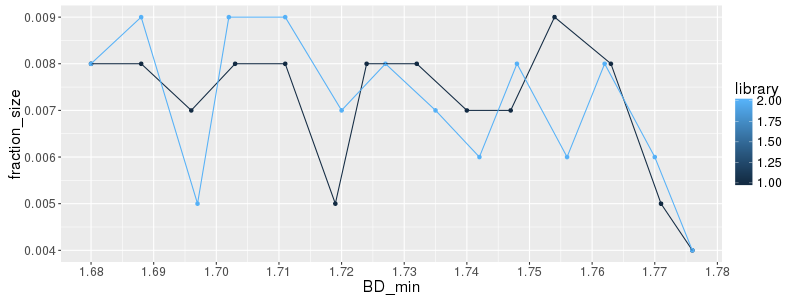

In [61]:
%%R -w 800 -h 300
# plotting
df = read.delim('fracs-n2-unif.txt', sep='\t')

df %>%
    group_by(library) %>%
    summarize(n=n()) %>%
    print

ggplot(df, aes(BD_min, fraction_size, group=library, color=library)) +
    geom_point() +
    geom_line() +
    scale_x_continuous(breaks=seq(1.68, 1.78, 0.01)) +
    theme(
        text = element_text(size=16)
    )

# TODO

* edit fraction simulation so fraction size cutoffs affect light, not heavy gradients

# SIPSim of shotgun fragments

* for comparing to fluormetric quanitification

In [7]:
!SIPSim fragments \
    genome_index.txt \
    --fp genomes \
    --fld skewed-normal,9000,2500,-5 \
    --flr None,None \
    --nf 100X \
    --np 2 \
    2> shotFrag_skewN90-25-n5-nS.log \
    > shotFrag_skewN90-25-n5-nS.pkl
    
!tail shotFrag_skewN90-25-n5-nS.log

Processing: "Methanosarcina_barkeri_MS"
Processing: "Methylobacterium_extorquens_AM1"
  Genome name: Methanosarcina_barkeri_MS
  Genome length (bp): 4533209
  Number of amplicons: None
  Number of fragments simulated: 64371
  Genome name: Methylobacterium_extorquens_AM1
  Genome length (bp): 5511322
  Number of amplicons: None
  Number of fragments simulated: 78250


## Converting to 2d-kde objects

* Also converts fragment G+C to buoyant density

In [21]:
!SIPSim fragment_KDE \
    shotFrag_skewN90-25-n5-nS.pkl \
    > shotFrag_skewN90-25-n5-nS_kde.pkl

!ls -thlc shotFrag_skewN90-25-n5-nS_kde.pkl

-rw-rw-r-- 1 nick nick 2.2M Mar  8 09:22 shotFrag_skewN90-25-n5-nS_kde.pkl


## Adding diffusion

In [25]:
!SIPSim diffusion \
    shotFrag_skewN90-25-n5-nS_kde.pkl \
    --bw $bandwidth \
    --np 2 \
    > shotFrag_skewN90-25-n5-nS_dif_kde.pkl
    
!ls -thlc shotFrag_skewN90-25-n5-nS_dif_kde.pkl

Processing: Methylobacterium_extorquens_AM1
Processing: Methanosarcina_barkeri_MS
-rw-rw-r-- 1 nick nick 7.7M Mar  8 09:26 shotFrag_skewN90-25-n5-nS_dif_kde.pkl


## Adding DBL smearing

In [28]:
!SIPSim DBL \
    shotFrag_skewN90-25-n5-nS_dif_kde.pkl \
    --comm comm.txt \
    --commx $DBL_scale \
    --bw $bandwidth \
    --np 2 \
    > shotFrag_skewN90-25-n5-nS_dif_kde_DBL.pkl

DBL_index file written: "DBL_index.txt"
Processing: Methylobacterium_extorquens_AM1
Processing: Methanosarcina_barkeri_MS


# SIPSim of amplicon fragments

* for comparing to qPCR results

## Simulating fragments

In [ ]:
# primers
primers = """>Ar109f
ACKGCTCAGTAACACGT
>Ar915r
GTGCTCCCCCGCCAATTCCT
>Ba519f
CAGCMGCCGCGGTAANWC
>Ba907r
CCGTCAATTCMTTTRAGTT
"""
primer_file = 'Ba-Ar_primers.fna'
with open(primer_file, 'wb') as outFH:
    outFH.write(primers)
    
!cat $primer_file

>Ar109f
ACKGCTCAGTAACACGT
>Ar915r
GTGCTCCCCCGCCAATTCCT
>Ba519f
CAGCMGCCGCGGTAANWC
>Ba907r
CCGTCAATTCMTTTRAGTT


In [16]:
!SIPSim fragments \
    genome_index.txt \
    --fp genomes_rn \
    --fr Ba-Ar_primers.fna \
    --fld skewed-normal,9000,2500,-5 \
    --flr None,None \
    --nf 10000 \
    --np 2 \
    2> ampFrag_skewN90-25-n5-nS.log \
    > ampFrag_skewN90-25-n5-nS.pkl
    
!tail ampFrag_skewN90-25-n5-nS.log    

Processing: "Methanosarcina_barkeri_MS"
Processing: "Methylobacterium_extorquens_AM1"
  Genome name: Methanosarcina_barkeri_MS
  Genome length (bp): 4533209
  Number of amplicons: 3
  Number of fragments simulated: 10000
  Genome name: Methylobacterium_extorquens_AM1
  Genome length (bp): 5511322
  Number of amplicons: 5
  Number of fragments simulated: 10000


## Converting to 2d-kde objects

* Also converts fragment G+C to buoyant density

## Adding diffusion

## Adding DBL smearing